In [66]:
import numpy as py
import os, csv, datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import urllib.request, json 
import quandl as ql

https://query.yahooapis.com/v1/public/yql?q=select%20*%20from%20yahoo.finance.xchange%20where%20pair%20in%20(%22GBPHKD%22%2C%22HKDGBP%22)&format=json&diagnostics=true&env=store%3A%2F%2Fdatatables.org%2Falltableswithkeys&callback=

In [8]:
with urllib.request.urlopen("https://query.yahooapis.com/v1/public/yql?q=select%20*%20from%20yahoo.finance.xchange%20where%20pair%20in%20(%22GBPHKD%22%2C%22HKDGBP%22)&format=json&diagnostics=true&env=store%3A%2F%2Fdatatables.org%2Falltableswithkeys&callback=") as url:
    data = json.loads(url.read().decode())
    print(data)

{'query': {'count': 2, 'created': '2017-06-03T12:42:59Z', 'lang': 'en-US', 'diagnostics': {'url': [{'execution-start-time': '0', 'execution-stop-time': '1', 'execution-time': '1', 'content': 'http://www.datatables.org/yahoo/finance/yahoo.finance.xchange.xml'}, {'execution-start-time': '3', 'execution-stop-time': '3', 'execution-time': '0', 'content': 'http://download.finance.yahoo.com/d/quotes.csv?s=HKDGBP=X&f=snl1d1t1ab'}, {'execution-start-time': '3', 'execution-stop-time': '3', 'execution-time': '0', 'content': 'http://download.finance.yahoo.com/d/quotes.csv?s=GBPHKD=X&f=snl1d1t1ab'}], 'publiclyCallable': 'true', 'cache': [{'execution-start-time': '2', 'execution-stop-time': '3', 'execution-time': '1', 'method': 'GET', 'type': 'MEMCACHED', 'content': '53655f08b3a3635043f1b7ebef7c40e2'}, {'execution-start-time': '2', 'execution-stop-time': '3', 'execution-time': '1', 'method': 'GET', 'type': 'MEMCACHED', 'content': '3ca79b084ec30c3bf204b471a9975b02'}], 'query': [{'execution-start-tim

In [17]:
jn = urllib.request.urlopen("https://query.yahooapis.com/v1/public/yql?q=select%20*%20from%20yahoo.finance.xchange%20where%20pair%20in%20(%22GBPHKD%22%2C%22HKDGBP%22)&format=json&diagnostics=true&env=store%3A%2F%2Fdatatables.org%2Falltableswithkeys&callback=").read() 
df = pd.read_json(jn)

##### Yahoo live query require more work - although it will have daily live query and cover public holidays as well...
##### For long term analysis purpose, Quandl with suffice 

In [59]:
Quandl_DF = ql.get("BOE/XUDLHDS", authtoken="AUpKE1-xMYxathtHrkNK", start_date="1989-01-01", end_date="2017-12-31").reset_index()
Quandl_DF.columns = ['Date', 'GBP_to_HKD']

In [82]:
#Quandl_DF['Date_series'] = pd.to_datetime(Quandl_DF['Date'])
Quandl_DF['Month'] = Quandl_DF['Date'].dt.month
Quandl_DF['Year'] = Quandl_DF['Date'].dt.year
Quandl_DF['WeekNo'] = Quandl_DF['Date'].dt.week

In [84]:
#Quandl_DF.drop(['Date_series'], axis = 1,  inplace = True)
Quandl_DF.info()
Quandl_DF.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7181 entries, 0 to 7180
Data columns (total 5 columns):
Date          7181 non-null datetime64[ns]
GBP_to_HKD    7181 non-null float64
Month         7181 non-null int64
Year          7181 non-null int64
WeekNo        7181 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 280.6 KB


,Date,GBP_to_HKD,Month,Year,WeekNo
7176,2017-05-25,10.0880,5,2017,21
7177,2017-05-26,9.9680,5,2017,21
7178,2017-05-30,10.0237,5,2017,22
7179,2017-05-31,10.0618,5,2017,22
7180,2017-06-01,10.0540,6,2017,22


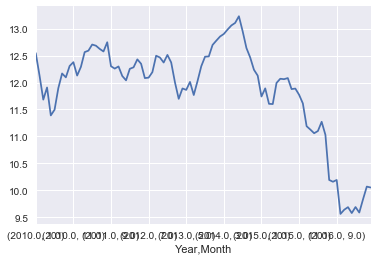

In [81]:
X =Quandl_DF.where(Quandl_DF['Date'] >= '20100101').groupby(['Year','Month'])['GBP_to_HKD'].mean().plot()

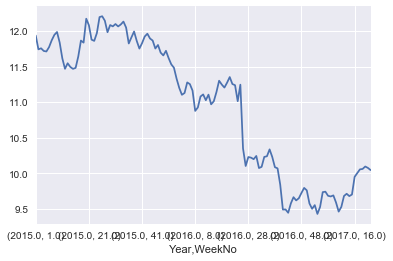

In [86]:
X =Quandl_DF.where(Quandl_DF['Date'] >= '20150101').groupby(['Year','WeekNo'])['GBP_to_HKD'].mean().plot()

Try this next:
In [1]: from pandas_datareader.oanda import get_oanda_currency_historical_rates
In [2]: start, end = "2016-01-01", "2016-06-01"
In [3]: quote_currency = "USD"
In [4]: base_currency = ["EUR", "GBP", "JPY"]
In [5]: df_rates = get_oanda_currency_historical_rates(
            start, end,
            quote_currency=quote_currency,
            base_currency=base_currency
        )
In [6]: print(df_rates)

OANDA http://pandas-datareader.readthedocs.io/en/latest/remote_data.html